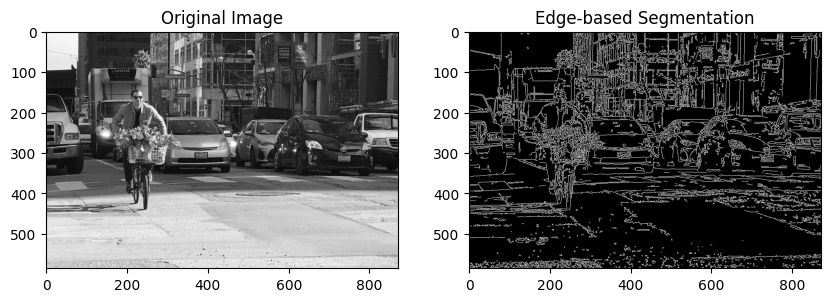

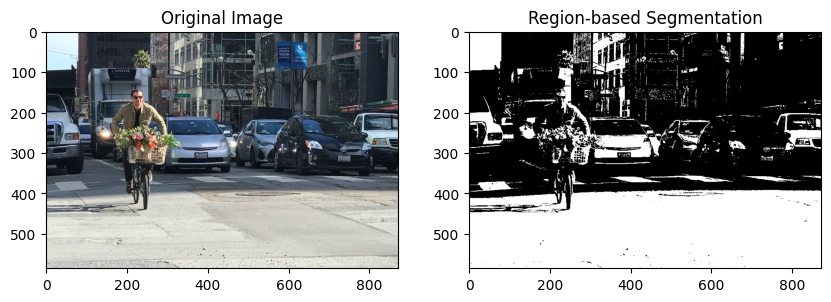

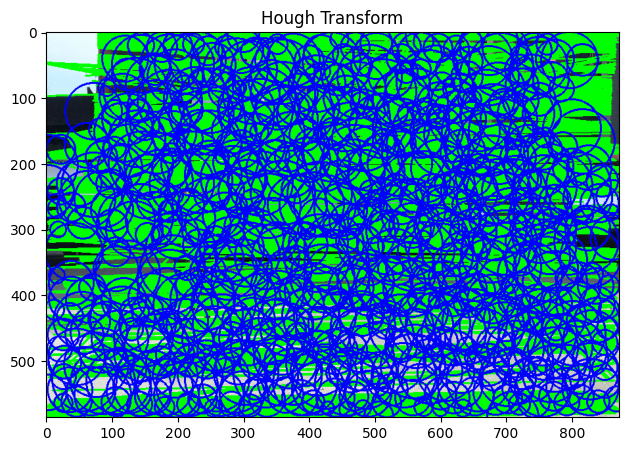

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Task 1: Image Segmentation and Object Identification using Hough Transform

# T1.1 Edge-based segmentation
def edge_based_segmentation(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, 100, 200)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')

    plt.subplot(1,2,2)
    plt.title("Edge-based Segmentation")
    plt.imshow(edges, cmap='gray')
    plt.show()

    return edges

# T1.2 Region-based segmentation
def region_based_segmentation(image_path):
    image = cv2.imread(image_path)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, threshold = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1,2,2)
    plt.title("Region-based Segmentation")
    plt.imshow(threshold, cmap='gray')
    plt.show()

# T1.3 Hough Transform for detecting specific shapes
def hough_transform(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)

    # Detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Detect circles
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=5, maxRadius=50)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(image, (i[0], i[1]), i[2], (255, 0, 0), 2)

    plt.figure(figsize=(10,5))
    plt.title("Hough Transform")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()


image_path = "road.jpg"
edges = edge_based_segmentation(image_path)
region_based_segmentation(image_path)
hough_transform(image_path)


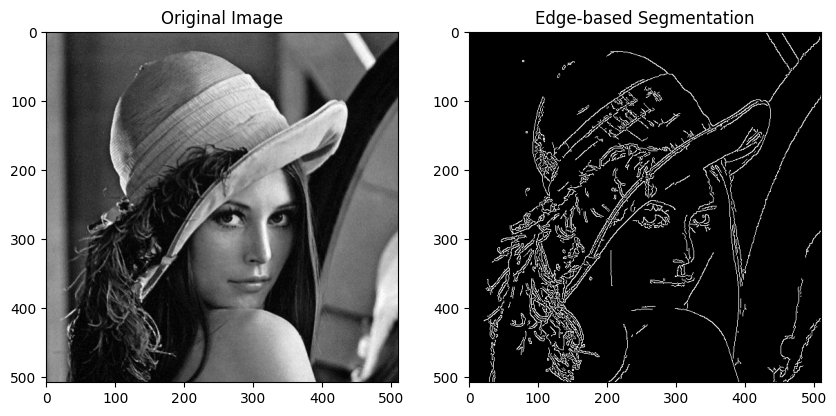

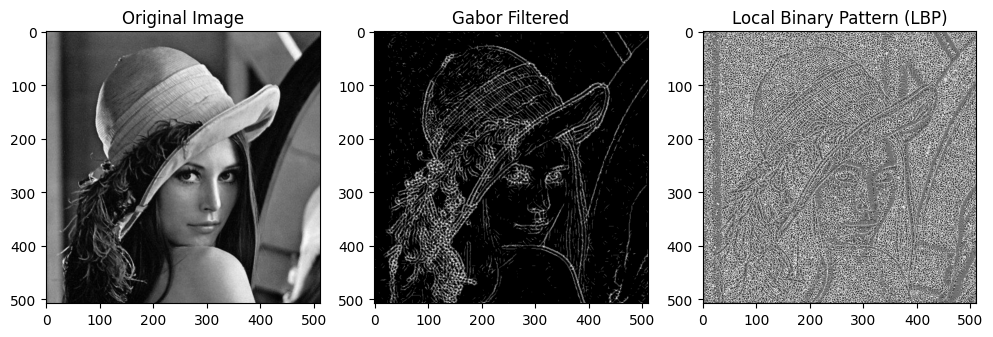

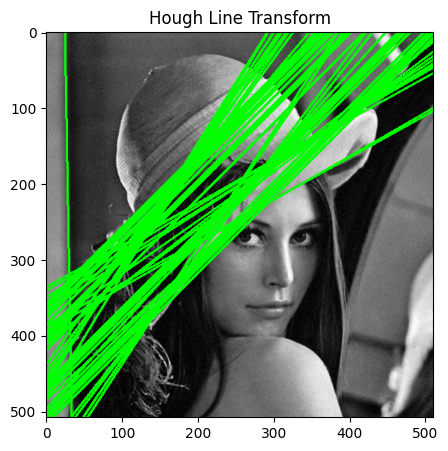

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gabor
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray

# Task 1: Image Segmentation and Object Identification

# T1.1 Edge-based segmentation
def edge_based_segmentation(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, 100, 200)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("Edge-based Segmentation")
    plt.imshow(edges, cmap='gray')
    plt.show()

    return edges

# T1.2 Region-based segmentation using Gabor filter and LBP
def region_based_segmentation(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Gabor Filtering
    gabor_kernels = [(0, 8), (45, 8), (90, 8), (135, 8)]
    gabor_responses = [gabor(gray, frequency=0.2, theta=np.deg2rad(theta))[0] for theta, sigma in gabor_kernels]
    gabor_image = np.sum(gabor_responses, axis=0)

    # Local Binary Pattern (LBP)
    lbp = local_binary_pattern(gray, P=8, R=1, method="uniform")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 3, 2)
    plt.title("Gabor Filtered")
    plt.imshow(gabor_image, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Local Binary Pattern (LBP)")
    plt.imshow(lbp, cmap='gray')
    plt.show()

# T1.3 Hough Line Transform for line detection
def hough_transform(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    # Detect lines using Hough Transform
    lines = cv2.HoughLines(edges, 1, np.pi/180, 150)
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.figure(figsize=(10, 5))
    plt.title("Hough Line Transform")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

image_path = "/content/girl.png"
edges = edge_based_segmentation(image_path)
region_based_segmentation(image_path)
hough_transform(image_path)


 YOLO Object Detection


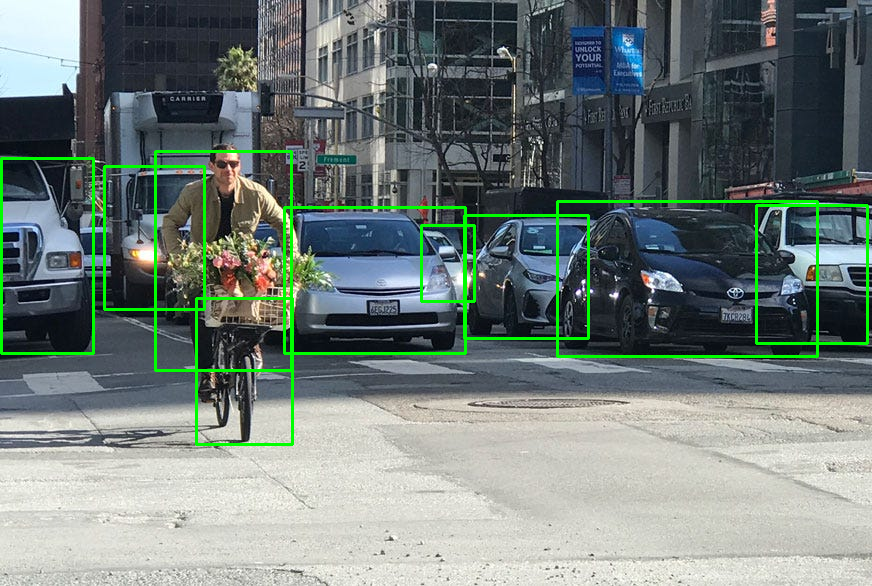

Faster R-CNN Object Detection


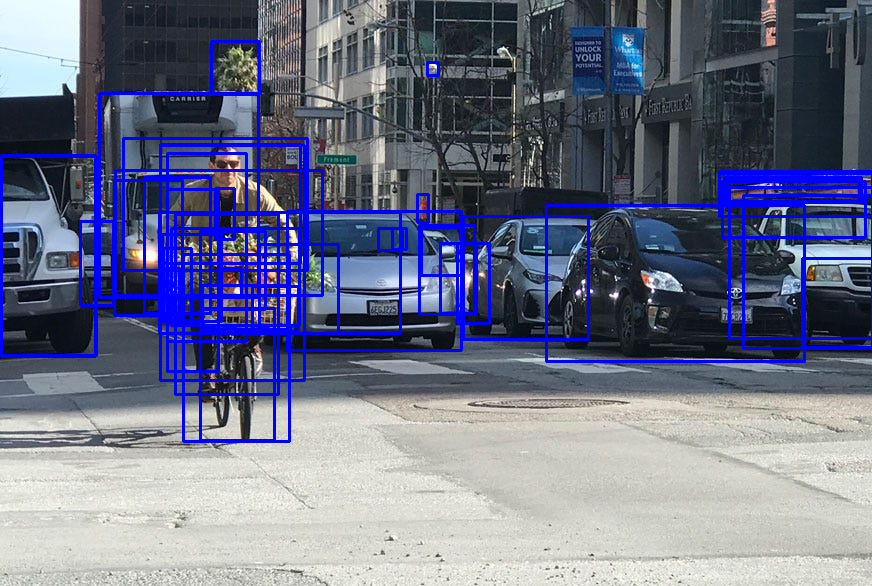

In [ ]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from google.colab.patches import cv2_imshow
import warnings
warnings.filterwarnings("ignore")

# Download YOLO model files
#!wget -O yolov3.weights https://pjreddie.com/media/files/yolov3.weights                        (uncomment if you dont have yolo files)
#!wget -O yolov3.cfg https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true     (uncomment if you dont have yolo files)

# Load an image
image_path = 'road.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Task 1.1: YOLO Object Detection
def detect_objects_yolo(image):
    net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

    height, width, _ = image.shape
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    outputs = net.forward(output_layers)

    boxes, confidences, class_ids = [], [], []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x, center_y, w, h = (detection[0:4] * np.array([width, height, width, height])).astype("int")
                x, y = int(center_x - w / 2), int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    for i in indices:
        x, y, w, h = boxes[i]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    print(" YOLO Object Detection")
    cv2_imshow(image)

detect_objects_yolo(image.copy())

# Task 1.2: Faster R-CNN Object Detection
def detect_objects_rcnn(image):
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    transform = transforms.Compose([transforms.ToTensor()])
    img_tensor = transform(image).unsqueeze(0)

    with torch.no_grad():
        outputs = model(img_tensor)

    for box in outputs[0]['boxes']:  # Bounding boxes
        x1, y1, x2, y2 = map(int, box.tolist())
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    print("Faster R-CNN Object Detection")
    cv2_imshow(image)

detect_objects_rcnn(image.copy())

--2025-03-17 03:46:52--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  33.5MB/s    in 7.5s    

2025-03-17 03:47:00 (31.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2025-03-17 03:47:00--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

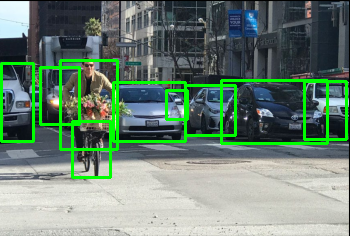

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 124MB/s]


Faster R-CNN Object Detection - Time: 10.0214 sec, Avg Confidence: 0.35


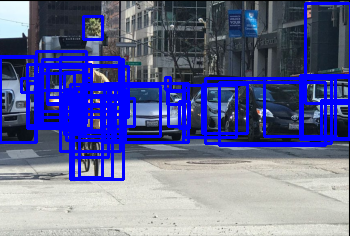

In [ ]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from google.colab.patches import cv2_imshow
import time
import warnings
warnings.filterwarnings("ignore")
!wget -O yolov3.weights https://pjreddie.com/media/files/yolov3.weights
!wget -O yolov3.cfg https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
# Load an image
image_path = '/content/road.png'  # Replace with your image path
image = cv2.imread(image_path)

def detect_objects_yolo(image):
    net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

    height, width, _ = image.shape
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    start_time = time.time()
    outputs = net.forward(output_layers)
    end_time = time.time()

    boxes, confidences, class_ids = [], [], []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x, center_y, w, h = (detection[0:4] * np.array([width, height, width, height])).astype("int")
                x, y = int(center_x - w / 2), int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    avg_confidence = np.mean(confidences) if confidences else 0

    for i in indices:
        x, y, w, h = boxes[i]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    print(f"YOLO Object Detection - Time: {end_time - start_time:.4f} sec, Avg Confidence: {avg_confidence:.2f}")
    cv2_imshow(image)

def detect_objects_rcnn(image):
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    transform = transforms.Compose([transforms.ToTensor()])
    img_tensor = transform(image).unsqueeze(0)

    start_time = time.time()
    with torch.no_grad():
        outputs = model(img_tensor)
    end_time = time.time()

    confidences = outputs[0]['scores'].tolist()
    avg_confidence = np.mean(confidences) if confidences else 0

    for box in outputs[0]['boxes']:
        x1, y1, x2, y2 = map(int, box.tolist())
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    print(f"Faster R-CNN Object Detection - Time: {end_time - start_time:.4f} sec, Avg Confidence: {avg_confidence:.2f}")
    cv2_imshow(image)

detect_objects_yolo(image.copy())
detect_objects_rcnn(image.copy())